In [15]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/dataset/firewall-malware-analysis/df_minimization.csv')

In [17]:
exception_col = 'Label'

for col in df.columns:
  if col != exception_col:
    df[col] = df[col].astype('float32')

df[exception_col] = df[exception_col].astype("int8")



In [18]:
DROP_COLS = [
    "Flow ID",
    "Source IP",
    "Source Port",
    "Destination IP",
    "Destination Port",
    "Timestamp",
    "Fwd Header Length.1"
]

df.drop(columns=DROP_COLS, inplace=True, errors="ignore")


Before Reshaping : 
 (50000, 76)
50000 x 76 data looks like:
 [ 1.6600000e+02  2.0000000e+00  2.0000000e+00  5.8000000e+01
  1.2200000e+02  2.9000000e+01  2.9000000e+01  2.9000000e+01
  0.0000000e+00  6.1000000e+01  6.1000000e+01  6.1000000e+01
  0.0000000e+00  1.0843374e+06  2.4096385e+04  5.5333332e+01
  9.0643990e+01  1.6000000e+02  3.0000000e+00  3.0000000e+00
  3.0000000e+00  0.0000000e+00  3.0000000e+00  3.0000000e+00
  3.0000000e+00  3.0000000e+00  0.0000000e+00  3.0000000e+00
  3.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  4.0000000e+01  4.0000000e+01  1.2048192e+04
  1.2048192e+04  2.9000000e+01  6.1000000e+01  4.1799999e+01
  1.7527122e+01  3.0720001e+02  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  1.0000000e+00  5.2250000e+01
  2.9000000e+01  6.1000000e+01  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  2.0000000e+00  5.8000

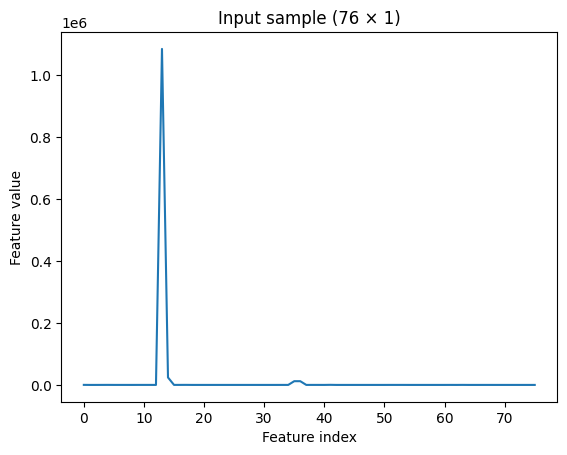

[0 1 1 ... 0 1 1]


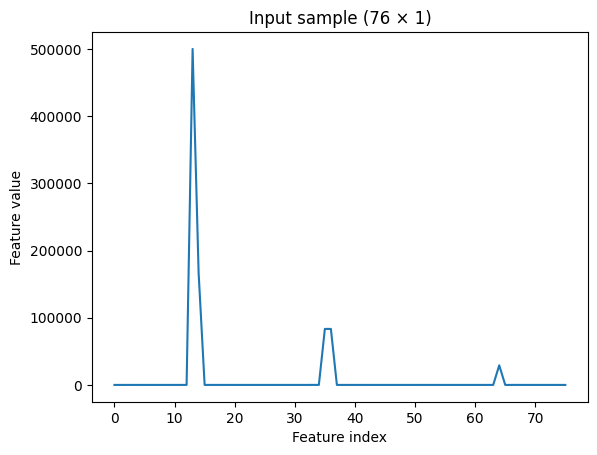

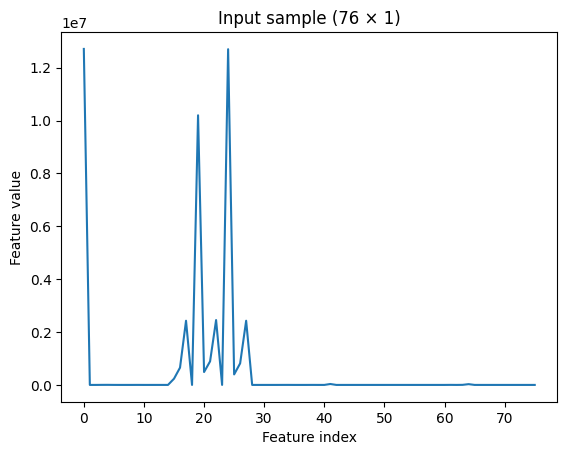

In [31]:
import matplotlib.pyplot as plt


X = df.drop("Label", axis=1).values
y = df["Label"].values
print("Before Reshaping : \n",X.shape)
print("50000 x 76 data looks like:\n", X[0])
X = X.reshape(X.shape[0], X.shape[1], 1)
print("\n\nAfter Reshaping : \n",X.shape)
print("50000 x 76 x 1 data looks like:\n", X[0])



idx = 0
x_sample = X[idx].squeeze()   # shape (76,)

plt.figure()
plt.plot(x_sample)
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.title("Input sample (76 × 1)")
plt.show()

print(y)

idx = 1
x_sample = X[idx].squeeze()   # shape (76,)

plt.figure()
plt.plot(x_sample)
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.title("Input sample (76 × 1)")
plt.show()


idx = 2
x_sample = X[idx].squeeze()   # shape (76,)

plt.figure()
plt.plot(x_sample)
plt.xlabel("Feature index")
plt.ylabel("Feature value")
plt.title("Input sample (76 × 1)")
plt.show()


In [20]:
import numpy as np
print("The Shape of the Input data : " + str(X.shape))
print("The Shape of the Output data : " + str(y.shape))

The Shape of the Input data : (50000, 76, 1)
The Shape of the Output data : (50000,)


In [21]:
class Relu:
  def forward(self, input_data):
    return np.maximum(0, input_data)

  def backward(self, grad_out):
        return grad_out * self.mask

In [22]:
class Conv1DLayer:
    def __init__(self, num_filters, kernel_size):
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.filters = None

    def forward(self, x):
        batch, time, features = x.shape

        if self.filters is None:
            self.filters = np.random.randn(
                self.num_filters, self.kernel_size, features
            ) * 0.01

        output_time = time - self.kernel_size + 1
        out = np.zeros((batch, output_time, self.num_filters))

        for b in range(batch):
            for f in range(self.num_filters):
                for t in range(output_time):
                    window = x[b, t:t+self.kernel_size, :]
                    out[b, t, f] = np.sum(window * self.filters[f])

        return out


In [ ]:
class MaxPooling1DLayer:
    def __init__(self, pool_size):
        self.pool_size = pool_size

    def forward(self, x):
        batch, time, features = x.shape
        output_time = time // self.pool_size

        out = np.zeros((batch, output_time, features))

        for b in range(batch):
            for t in range(output_time):
                window = x[b,
                           t*self.pool_size:(t+1)*self.pool_size,
                           :]
                out[b, t, :] = np.max(window, axis=0)

        return out


In [ ]:
import numpy as np

class Dense:
    def __init__(self, input_dim, output_dim, activation=None):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((1, output_dim))
        self.activation = activation

    def forward(self, x):
        self.x = x
        z = np.dot(x, self.W) + self.b

        if self.activation == "relu":
            self.out = np.maximum(0, z)

        elif self.activation == "softmax":
            exp = np.exp(z - np.max(z, axis=1, keepdims=True))
            self.out = exp / np.sum(exp, axis=1, keepdims=True)

        elif self.activation == "sigmoid":
            self.out = 1 / (1 + np.exp(-z))

        else:
            self.out = z

        return self.out



In [ ]:
conv1 = Conv1DLayer(num_filters=8, kernel_size=3)
x = conv1.forward(X)

pool1 = MaxPooling1DLayer(pool_size=2)
x = pool1.forward(x)

print("After first pooling:", x.shape)



conv2 = Conv1DLayer(num_filters=16, kernel_size=3)
x = conv2.forward(x)

pool2 = MaxPooling1DLayer(pool_size=2)
x = pool2.forward(x)

print("After second pooling:", x.shape)

batch, time, features = x.shape
x = x.reshape(batch, time * features)

dense = Dense(input_dim=time * features, output_dim=2, activation="softmax")
predictions = dense.forward(x)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


After first pooling: (50000, 37, 8)
After second pooling: (50000, 17, 16)


In [ ]:
predictions.shape

(50000, 2)

In [ ]:
predictions

array([[9.11018710e-01, 8.89812895e-02],
       [7.06500162e-03, 9.92934998e-01],
       [1.00000000e+00, 2.37390026e-77],
       ...,
       [6.00927878e-14, 1.00000000e+00],
       [1.00000000e+00, 3.19759729e-34],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
class RNN:
  def __init__(self,)

SyntaxError: invalid syntax (ipython-input-451046871.py, line 1)